In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
####################
# Libraries        #
####################

import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.graph_objects as go    # for data visualisation
import plotly.express as px
import matplotlib.pyplot as plt

import os
import glob

from sklearn.cluster import DBSCAN

In [4]:
##########################
# Functions              #
##########################

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get country, city, state
def getLocation(Latitude, Longitude):

    try: 
        location = geolocator.reverse(Latitude+","+Longitude)

        if 'error' in location.raw.keys():
            print("-----------None-----------")
            return pd.Series([np.nan, np.nan])

        # Display
    #     print(location.raw)

        address = location.raw['address']
    #     print(address)

    #     city = address.get('city', '')
        state = address.get('state', '')
        country = address.get('country', '')
    #     code = address.get('country_code')
    #     zipcode = address.get('postcode')
    #     print('City : ',city)
    #     print('State : ',state)
    #     print('Country : ',country)
    #     print('Country Code : ', code)
    #     print('Zip Code : ', zipcode)
        return pd.Series([country, state])
    
#     except GeocoderTimedOut:
#         print("-----------GeocoderTimedOut-----------")
#         return pd.Series([np.nan, np.nan])
    except:
        print("Something else went wrong")
        return pd.Series([np.nan, np.nan])
    
    
    
########### FOR PLOTTING    
def createDataObject(df, date, attributes):
    
    df_selected = df[df["Date"]==date]
    
    # Set hovering text as a new column
    df_selected['text'] = df_selected['Country'].astype(str) + "," + df_selected["State"].astype(str) + ' <br>RH:=' + df_selected['RH'].astype(str) + ' <br>Temp_BB: '+ df_selected['Temp_BB'].astype(str)

    data = go.Scattergeo(
        lon = df_selected["Lon_GMTCO"],
        lat = df_selected["Lat_GMTCO"],
        text = df_selected["text"],
        mode = "markers",
        marker = dict(
            size = np.where(df_selected[attributes[1]].isna(), df_selected[attributes[1]], 0.0),       
            opacity = 0.8,
            reversescale = True, # set the reversescale and autocolorscale as True to enable the color of markers automatically changed
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width = 1,
                color = 'rgba(102, 102, 102)'
            ),
            cmin = 0, # cmin/cmax == lower/upper bound of the color domain for the data points
            color = df_selected[attributes[0]],
            cmax = df_selected[attributes[0]].max(), #
            colorbar_title = attributes[0]
        )
    )
    return data
    

 ########### FOR PLOTTING 
def plotInteractive(df, attributes):
    uniqueDates = df["Date"].unique()
    
    # Create data object
    data_slider = []
    for date in uniqueDates:
        data_object = createDataObject(df, date, attributes)
        data_slider.append(data_object)

    fig = go.Figure(data = data_slider)
                    
    # Create step slider

    steps = []

    for idx in range(len(data_slider)):
        step = dict(method='restyle',
                    args=['visible', [False] * len(data_slider)],
                    label = '{}'.format(uniqueDates[idx].strftime("%x")))
        step['args'][1][idx] = True
        steps.append(step)

    sliders = [dict(active=1, pad={"t":1}, steps=steps)]

    fig.update_layout(
    sliders=sliders,
    title = "BRAINWAVE - GAS FLARING",
    geo = dict(
        scope = "world", # ccope options: world, usa, europe, africa, north america, south america
        showland = True,
    ))
    

    return fig

In [4]:
#####################################
# TEST FUNCTIONS WRITTEN            #
#####################################
# TEST --- getLocation()
# IDX = 8
# Latitude = -29.911612
# Longitude = 135.328033
# print(Latitude, Longitude) 

# test_2 = getLocation(Latitude, Longitude)

# print(test_2)

In [5]:
# #############################################
# # Find all csv files needed in a directory  #
# #############################################
# SELECTEDYEAR = ['2017']
# PATH = '/home/s1459898/Projects/dataSciencePractice/brainwave/vnf'
# EXTENSION = 'csv'
# FILES = []

# os.chdir(PATH)
# for YEAR in SELECTEDYEAR:
#     FILES.extend(glob.glob('{}*.{}'.format(YEAR,EXTENSION))[0:3]) ########################### DELETE THE CONSTRAINTS
# print("TOTAL FILES = {}".format(len(FILES)))

# #############################################
# # Read the data from the FILES              #
# #############################################
# df = pd.DataFrame()
# COUNTER = 1
# for i in range(len(FILES)):
#     print("COUNTER = {}/{}".format(COUNTER,len(FILES)))
#     COUNTER +=1
#     test = pd.read_csv("/home/s1459898/Projects/dataSciencePractice/brainwave/vnf/"+ FILES[i])
#     test = test.drop(test.columns[[0]], axis=1)
# #     test = test.iloc[0:5,:] ########################### DELETE THE CONSTRAINTS
    
#     df = pd.concat([df,test], ignore_index=True)


In [6]:
# ###########################################################
# # Save the data with new columns country/state            #
# ###########################################################
# GETLOCATION = False
# if GETLOCATION:
#     COUNTER = 1
#     for i in range(len(FILES)):
#         print(i)
#         print("COUNTER = {}/{}".format(COUNTER,len(FILES)))
#         COUNTER +=1
#         test = pd.read_csv("/home/s1459898/Projects/dataSciencePractice/brainwave/vnf/"+ FILES[i])
#         test = test.drop(test.columns[[0]], axis=1)

#         test = test.iloc[0:5,:] ########################### DELETE THE CONSTRAINTS

#         # Filter 'id_Key' is na
#         test  = test[test ["id_Key"].notna()]

#         # Create two columns: country/state from latitude and longitude 
#         test[['Country','State']] = test.apply(lambda row: getLocation(str(row.Lat_GMTCO), str(row.Lon_GMTCO)), axis = 1)

#          # Save the combined df to csv
#         test.to_csv("/home/s1459898/Projects/dataSciencePractice/brainwave/vnf/data/new_"+FILES[i],index=False, header=True)

    

In [6]:
###########################################
# Read the data from one file             #
###########################################
chunk = pd.read_csv("/content/gdrive/MyDrive/Gas Flaring Brainnwave/vnf_2017/vnf_2017.csv", chunksize=1000000)
df = pd.concat(chunk)

In [7]:
display(df.head())
# df.describe()
print("The columns of df: \n{}".format(df.columns))
print("\nThe dimentions of df:{}".format(df.shape))
# df.dtypes

,Unnamed: 0,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10
0,0,x1623810W_y007026S_l0195_s0448_v21,2017/01/01 11:37:21.687,-0.702552,-162.380981,999999,999999.0,999999.0,999999.0,0,448
1,1,x1525411W_y023566S_l0205_s1704_v21,2017/01/01 11:37:21.687,-2.356650,-152.541077,999999,999999.0,999999.0,999999.0,0,1704
2,2,x1636764W_y011420S_l0292_s0300_v21,2017/01/01 11:37:32.363,-1.142022,-163.676407,999999,999999.0,999999.0,999999.0,0,300
3,3,x1418949W_y051672S_l0382_s3038_v21,2017/01/01 11:37:41.259,-5.167172,-141.894897,999999,999999.0,999999.0,999999.0,0,3038
4,4,x1640616W_y019311S_l0420_s0278_v21,2017/01/01 11:37:46.597,-1.931143,-164.061615,999999,999999.0,999999.0,999999.0,0,278


The columns of df: 
Index(['Unnamed: 0', 'id_Key', 'Date_Mscan', 'Lat_GMTCO', 'Lon_GMTCO',
       'Temp_BB', 'RHI', 'RH', 'Area_BB', 'Cloud_Mask', 'Sample_M10'],
      dtype='object')

The dimentions of df:(10595199, 11)


In [8]:
######################
# DATA CLEANING      #
######################
df = df.drop(df.columns[[0]], axis=1)

# Filter 'id_Key' is na
df = df[df["id_Key"].notna()]

# Create a column with only date
df['Date'] = pd.to_datetime(df['Date_Mscan']).dt.date

# Sort df by date
#df = df.sort_values(by="Date")

# Replace 999999 to 0
df = df.replace([999999], np.nan)

display(df.head())

,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date
0,x1623810W_y007026S_l0195_s0448_v21,2017/01/01 11:37:21.687,-0.702552,-162.380981,NaN,NaN,NaN,NaN,0.0,448,2017-01-01
1,x1525411W_y023566S_l0205_s1704_v21,2017/01/01 11:37:21.687,-2.356650,-152.541077,NaN,NaN,NaN,NaN,0.0,1704,2017-01-01
2,x1636764W_y011420S_l0292_s0300_v21,2017/01/01 11:37:32.363,-1.142022,-163.676407,NaN,NaN,NaN,NaN,0.0,300,2017-01-01
3,x1418949W_y051672S_l0382_s3038_v21,2017/01/01 11:37:41.259,-5.167172,-141.894897,NaN,NaN,NaN,NaN,0.0,3038,2017-01-01
4,x1640616W_y019311S_l0420_s0278_v21,2017/01/01 11:37:46.597,-1.931143,-164.061615,NaN,NaN,NaN,NaN,0.0,278,2017-01-01


In [9]:
#### Select the subset of data that does not have na value for temp_BB
print("Number of rows removed: {}-{}={} ({:.2f}%)".format(df.shape[0], df[df["Temp_BB"].isnull()].shape[0], df[df["Temp_BB"].notna()].shape[0], df[df["Temp_BB"].isnull()].shape[0]/df.shape[0]*100))

df_noNA = df[df["Temp_BB"].notna()]
print("\nDimension of df_noNA: {}".format(df_noNA.shape))

Number of rows removed: 10594326-7261375=3332951 (68.54%)

Dimension of df_noNA: (3332951, 11)


In [11]:
#### Create new column to df_noNA to indicate whether temperature exceed 1400k or not
df_noNA["Above_1400K"] = np.where(df_noNA['Temp_BB']>= 1400, True, False)

display(df_noNA.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date,Above_1400K
37,x0836342E_y684144N_l2140_s3091_v21,2017/01/01 01:03:38.689,68.414368,83.634171,1733.0,33.65390,67.0111,131.0860,0.0,3091,2017-01-01,True
38,x0836410E_y684024N_l2140_s3092_v21,2017/01/01 01:03:38.689,68.402435,83.640961,1884.0,14.46620,28.8822,40.4495,0.0,3092,2017-01-01,True
39,x0835980E_y684115N_l2141_s3091_v21,2017/01/01 01:03:38.689,68.411530,83.598038,1773.0,7.22975,14.3959,25.6943,0.0,3091,2017-01-01,True
40,x0836047E_y683998N_l2141_s3092_v21,2017/01/01 01:03:38.689,68.399780,83.604691,1517.0,5.98360,11.9463,39.7925,0.0,3092,2017-01-01,True
44,x0836079E_y684145N_l2149_s3091_v21,2017/01/01 01:03:40.468,68.414467,83.607948,1789.0,30.08700,59.8867,103.1950,0.0,3091,2017-01-01,True


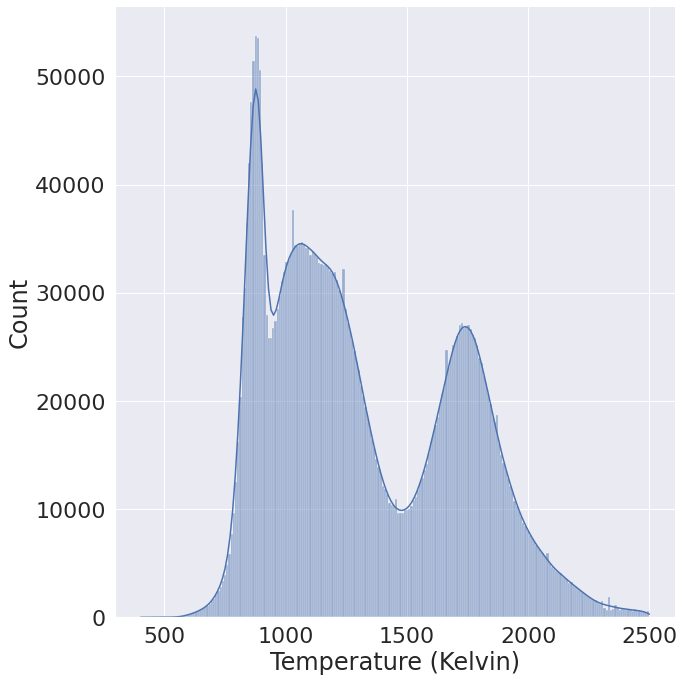

In [ ]:
import seaborn as sns
sns.set(font_scale = 2)
sns.displot(data=df_noNA, x="Temp_BB", kde=True, height=10, aspect=1.0).set(xlabel="Temperature (Kelvin)")


The dimentions of df:(8934, 12)


,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date,Above_1400K
37,x0836342E_y684144N_l2140_s3091_v21,2017/01/01 01:03:38.689,68.414368,83.634171,1733.0,33.653900,67.011100,131.08600,0.0,3091,2017-01-01,True
38,x0836410E_y684024N_l2140_s3092_v21,2017/01/01 01:03:38.689,68.402435,83.640961,1884.0,14.466200,28.882200,40.44950,0.0,3092,2017-01-01,True
39,x0835980E_y684115N_l2141_s3091_v21,2017/01/01 01:03:38.689,68.411530,83.598038,1773.0,7.229750,14.395900,25.69430,0.0,3091,2017-01-01,True
40,x0836047E_y683998N_l2141_s3092_v21,2017/01/01 01:03:38.689,68.399780,83.604691,1517.0,5.983600,11.946300,39.79250,0.0,3092,2017-01-01,True
44,x0836079E_y684145N_l2149_s3091_v21,2017/01/01 01:03:40.468,68.414467,83.607948,1789.0,30.087000,59.886700,103.19500,0.0,3091,2017-01-01,True
...,...,...,...,...,...,...,...,...,...,...,...,...
24354,x1038074E_y072054N_l2992_s1142_v21,2017/01/01 18:20:48.655,7.205389,103.807426,1850.0,0.828735,0.672268,1.01108,0.0,1142,2017-01-01,True
24357,x1147087E_y054277N_l2998_s2520_v21,2017/01/01 18:20:50.434,5.427681,114.708687,1560.0,3.185600,4.174490,12.42570,3.0,2520,2017-01-01,True
24358,x1147194E_y054259N_l2998_s2521_v21,2017/01/01 18:20:50.434,5.425875,114.719406,1926.0,1.079030,1.417570,1.81506,3.0,2521,2017-01-01,True
24359,x1041782E_y069722N_l3019_s1190_v21,2017/01/01 18:20:52.214,6.972231,104.178192,1688.0,1.813830,1.370500,2.98052,3.0,1190,2017-01-01,True


(array([7.37140471e-06, 3.16403371e-04, 7.57553592e-04, 1.68124731e-03,
        4.04293197e-04, 5.64763007e-04, 8.49412635e-04, 3.22073683e-04,
        1.30984191e-04, 3.17537434e-05]),
 array([ 521. ,  718.4,  915.8, 1113.2, 1310.6, 1508. , 1705.4, 1902.8,
        2100.2, 2297.6, 2495. ]),
 <a list of 10 Patch objects>)

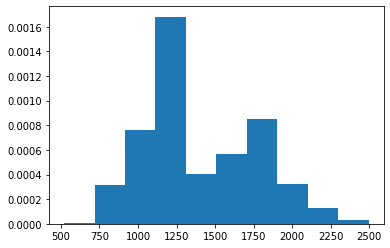

In [12]:
### Select specific data to plot
uniqueDates = df_noNA["Date"].unique()
DATE = uniqueDates[0]
df_selected = df_noNA[df_noNA["Date"]==DATE]

print("\nThe dimentions of df:{}".format(df_selected.shape))
display(df_selected)

plt.hist(df_selected["Temp_BB"], density=True,)

(array([1.89853112e-02, 2.47492907e-04, 7.38136740e-05, 4.34198082e-05,
        1.95389137e-05, 1.30259425e-05, 6.51297124e-06, 2.17099041e-06,
        0.00000000e+00, 4.34198082e-06]),
 array([2.7490000e-01, 5.1832910e+01, 1.0339092e+02, 1.5494893e+02,
        2.0650694e+02, 2.5806495e+02, 3.0962296e+02, 3.6118097e+02,
        4.1273898e+02, 4.6429699e+02, 5.1585500e+02]),
 <a list of 10 Patch objects>)

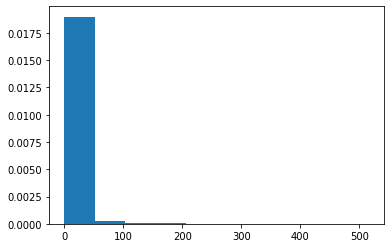

In [13]:
plt.hist(df_selected["RHI"], density=True,)


(array([1.68519638e-03, 1.08587151e-05, 3.04806037e-06, 1.90503773e-06,
        1.90503773e-07, 3.81007547e-07, 1.90503773e-07, 0.00000000e+00,
        0.00000000e+00, 1.90503773e-07]),
 array([1.13710000e-01, 5.87671339e+02, 1.17522897e+03, 1.76278660e+03,
        2.35034423e+03, 2.93790186e+03, 3.52545948e+03, 4.11301711e+03,
        4.70057474e+03, 5.28813237e+03, 5.87569000e+03]),
 <a list of 10 Patch objects>)

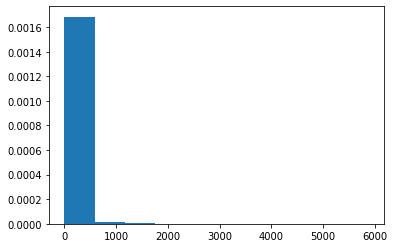

In [14]:
plt.hist(df_selected["Area_BB"], density=True,)

In [50]:
df_selected['text'] ='RH:=' + df_selected['RH'].astype(str) + ' <br>RHI:=' + df_selected['RHI'].astype(str) + ' <br>Temp_BB: '+ df_selected['Temp_BB'].astype(str)+ ' <br>Area_BB: '+ df_selected['Area_BB'].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = df_selected["Lon_GMTCO"],
    lat = df_selected["Lat_GMTCO"],
    text = df_selected["text"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True, # set the reversescale and autocolorscale as True to enable the color of markers automatically changed
        autocolorscale = True,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = 0, # cmin/cmax == lower/upper bound of the color domain for the data points
        color = df_selected['Temp_BB'],
        cmax = df_selected['Temp_BB'].max(), #
        colorbar_title = "Temperature"
    )
))

fig.update_layout(
    title = "BRAINWAVE - GAS FLARING",
    geo = dict(
        scope = "world", # ccope options: world, usa, europe, africa, north america, south america
        showland = True,
    )
)

fig.show()
#fig.write_html('first_figure.html', auto_open=True) #generate a HTML page that shows the scatter map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



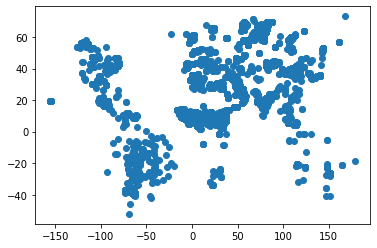

In [16]:
plt.scatter(df_selected["Lon_GMTCO"],df_selected["Lat_GMTCO"])

In [17]:
df_noNA[(df_noNA["Lat_GMTCO"]==68.402435) | (df_noNA["Lon_GMTCO"]== 83.640961)]

,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date,Above_1400K
38,x0836410E_y684024N_l2140_s3092_v21,2017/01/01 01:03:38.689,68.402435,83.640961,1884.0,14.466200,28.882200,40.449500,0.0,3092,2017-01-01,True
311158,x0836244E_y684024N_l1502_s0954_v21,2017/01/15 20:22:54.784,68.402435,83.624359,2250.0,0.510873,0.386608,0.266214,0.0,954,2017-01-15,True
1213013,x0836410E_y684169N_l2059_s2303_v21,2017/02/25 22:34:15.677,68.416862,83.640961,2379.0,0.340697,0.282767,0.155732,0.0,2303,2017-02-25,True
7659031,x0836352E_y684024N_l0378_s1204_v21,2017/09/16 20:48:11.415,68.402435,83.635155,1688.0,1.663730,1.234160,2.679060,0.0,1204,2017-09-16,True
10131265,x0836011E_y684024N_l0364_s3014_v21,2017/11/26 03:13:26.441,68.402435,83.601112,2055.0,3.327590,5.455330,5.398990,0.0,3014,2017-11-26,True


In [18]:
print(df_noNA["Lon_GMTCO"].shape)

print(len(df_noNA["Lat_GMTCO"].unique()))

print(len(df_noNA["Lon_GMTCO"].unique()))


(3332951,)
2989242
2997393


# CLUSRERING GEO LOCATION COORDINATES

In [19]:
#Link: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

################################################################################################
# Clustering geo location coordinates (lat,long pairs) using DBSCAN algorithm with Python      #
################################################################################################

#X = df_noNA[["Lat_GMTCO", "Lon_GMTCO"]].to_numpy()
#clustering = DBSCAN(eps=3, min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(X))

#df_noNA["Label"] = clustering.labels_.toList()

#df_noNA.to_csv("/content/gdrive/MyDrive/Gas Flaring Brainnwave/vnf_2017_label",index=False, header=True)


In [20]:
df_noNA.shape[0]

3332951

In [11]:
#### TESTING 
df_noNA_subset = df_noNA
df_noNA_subset = df_noNA_subset[(df_noNA_subset["Lat_GMTCO"] >= 35.0) &(df_noNA_subset["Lat_GMTCO"] <= 50.0)]
df_noNA_subset = df_noNA_subset[(df_noNA_subset["Lon_GMTCO"] >= -25.0) &(df_noNA_subset["Lon_GMTCO"] <= 50.0)]

df_noNA_subset = df_noNA_subset.sort_values(by="Lat_GMTCO")
df_noNA_subset = df_noNA_subset.iloc[0:int(df_noNA.shape[0])]
df_noNA_subset.shape

(134169, 11)

In [40]:
X = df_noNA_subset[["Lat_GMTCO", "Lon_GMTCO"]].to_numpy()
kms_per_radian = 6371.0088
EPSILON = 1.5*1 / kms_per_radian
print(EPSILON)

0.00023544152065839246


In [36]:
#use the haversine metric and ball tree algorithm to calculate great circle distances between points
#converted psilon and coordinates to radians, because scikit-learn’s haversine metric needs radian units
clustering = DBSCAN(eps=EPSILON, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
num_clusters = len(set(clustering.labels_))
print(num_clusters)

2135


In [24]:
df_noNA_subset["Label"] = clustering.labels_

#df_noNA.to_csv("/content/gdrive/MyDrive/Gas Flaring Brainnwave/vnf_2017_label",index=False, header=True)

df_noNA_subset.head()

,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date,Above_1400K,Label
2997074,x0059719W_y350002N_l0749_s0322_v21,2017/05/30 01:23:46.991,35.000179,-5.971918,1450.0,1.00102,1.22815,4.90615,0.0,322,2017-05-30,True,0
8533669,x0404643E_y350011N_l0035_s3024_v21,2017/10/09 00:07:14.261,35.001106,40.464291,1294.0,2.56094,4.26055,26.82040,NaN,3024,2017-10-09,False,1
6039983,x0466040E_y350015N_l0205_s2703_v21,2017/08/07 23:28:45.339,35.001526,46.604027,1068.0,4.07305,3.65884,49.64720,1.0,2703,2017-08-07,False,2
10472187,x0059676W_y350016N_l0115_s1798_v30,2017/12/21 02:20:21.805,35.001583,-5.967608,1034.0,1.62548,0.99446,15.35490,0.0,1798,2017-12-21,False,0
5204727,x0405838E_y350019N_l0180_s3018_v21,2017/07/21 00:06:19.396,35.001884,40.583786,1291.0,2.35398,3.86317,24.50670,0.0,3018,2017-07-21,False,1


In [25]:
clusters = pd.Series([X[clustering.labels_== n] for n in range(num_clusters)])
clusters

0       [[35.000179, -5.971918], [35.001583000000004, ...
1       [[35.001106, 40.464291], [35.001884000000004, ...
2       [[35.001526, 46.604027], [35.002819, 46.607998...
3       [[35.004272, 46.052521], [35.004951, 46.041622...
4       [[35.004337, 44.379051], [35.006664, 44.432674...
                              ...                        
2130                              [[49.984016, 4.879217]]
2131                    [[49.992821, 32.794146999999995]]
2132    [[49.992836, 36.626282], [49.993729, 36.612312...
2133    [[49.995228, 27.551552], [49.998318, 27.551212...
2134                             [[49.996098, 46.370113]]
Length: 2135, dtype: object

In [48]:
df_noNA_subset.loc[df_noNA_subset["Label"]==1,["Lat_GMTCO","Lon_GMTCO"]].values.size

928

In [39]:
clusters[1].size

928

In [26]:
#find a cluster's center-most point
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)
centermost_points

0                (35.146481, -5.675725)
1                 (35.29332, 40.465885)
2                (35.107784, 46.593742)
3                 (35.247505, 45.57708)
4                (35.669144, 44.025814)
                     ...               
2130              (49.984016, 4.879217)
2131    (49.992821, 32.794146999999995)
2132             (49.992836, 36.626282)
2133             (49.998318, 27.551212)
2134             (49.996098, 46.370113)
Length: 2135, dtype: object

In [27]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Lon_GMTCO':lons, 'Lat_GMTCO':lats})
rep_points

,Lon_GMTCO,Lat_GMTCO
0,-5.675725,35.146481
1,40.465885,35.293320
2,46.593742,35.107784
3,45.577080,35.247505
4,44.025814,35.669144
...,...,...
2130,4.879217,49.984016
2131,32.794147,49.992821
2132,36.626282,49.992836
2133,27.551212,49.998318


In [28]:
rs = rep_points.apply(lambda row: df_noNA_subset[(df_noNA_subset['Lat_GMTCO']==row['Lat_GMTCO']) & (df_noNA_subset['Lon_GMTCO']==row['Lon_GMTCO'])].iloc[0], axis=1)
rs

,id_Key,Date_Mscan,Lat_GMTCO,Lon_GMTCO,Temp_BB,RHI,RH,Area_BB,Cloud_Mask,Sample_M10,Date,Above_1400K,Label
0,x0056757W_y351465N_l0441_s1009_v21,2017/11/26 01:49:40.004,35.146481,-5.675725,1135.0,2.17952,1.513130,16.06530,1.0,1009,2017-11-26,False,0
1,x0404659E_y352933N_l0456_s0707_v21,2017/09/27 22:33:08.356,35.293320,40.465885,1340.0,3.74965,4.622110,25.29580,0.0,707,2017-09-27,False,1
2,x0465937E_y351078N_l0605_s1117_v21,2017/07/04 22:25:51.887,35.107784,46.593742,1066.0,6.36505,5.377060,73.54880,1.0,1117,2017-07-04,False,2
3,x0455771E_y352475N_l0124_s2907_v21,2017/08/17 23:41:22.030,35.247505,45.577080,1171.0,1.94479,2.508710,23.55690,1.0,2907,2017-08-17,False,3
4,x0440258E_y356691N_l0570_s2291_v21,2017/06/15 23:22:19.917,35.669144,44.025814,1228.0,1.39027,1.128060,8.75432,0.0,2291,2017-06-15,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,x0048792E_y499840N_l0303_s1383_v21,2017/03/26 01:38:05.798,49.984016,4.879217,847.0,1.72607,1.070570,36.70780,0.0,1383,2017-03-26,False,2130
2131,x0327941E_y499928N_l1795_s0856_v21,2017/03/11 23:18:57.309,49.992821,32.794147,842.0,1.13520,1.018120,35.69700,NaN,856,2017-03-11,False,2131
2132,x0366263E_y499928N_l0636_s0786_v21,2017/08/19 23:00:11.441,49.992836,36.626282,1199.0,2.14906,2.218090,18.93990,0.0,786,2017-08-19,False,2132
2133,x0275512E_y499983N_l0761_s0206_v21,2017/04/02 23:06:08.430,49.998318,27.551212,1272.0,1.32120,2.072210,13.94440,0.0,206,2017-04-02,False,2133


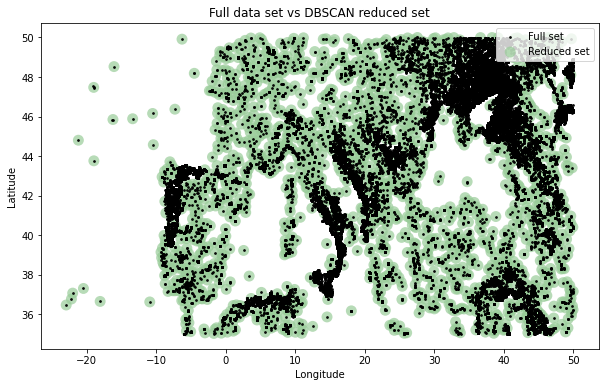

In [29]:
#visualize the cluster-reduced spatial data
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Lon_GMTCO'], rs['Lat_GMTCO'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df_noNA_subset['Lon_GMTCO'], df_noNA_subset['Lat_GMTCO'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

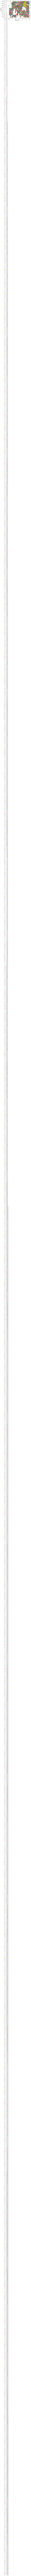

In [30]:
fig, ax = plt.subplots()
for i in range(0,num_clusters):
  temp = df_noNA_subset[df_noNA_subset['Label']==i] 
  ax.scatter(temp["Lon_GMTCO"],temp["Lat_GMTCO"],label=i)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

(1, 13)


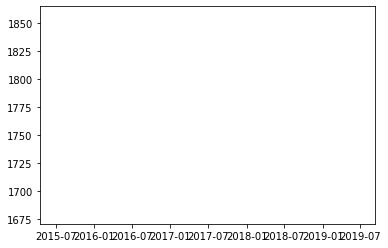

In [31]:
test_ = df_noNA_subset[df_noNA_subset['Label']==10].sort_values(by="Date")
print(test_.shape)

plt.plot(test_["Date"],test_["Temp_BB"])
plt.show()

(array([  238., 17676., 28731., 28845., 10711., 16874., 21955.,  6807.,
         1861.,   471.]),
 array([ 529. ,  726.1,  923.2, 1120.3, 1317.4, 1514.5, 1711.6, 1908.7,
        2105.8, 2302.9, 2500. ]),
 <a list of 10 Patch objects>)

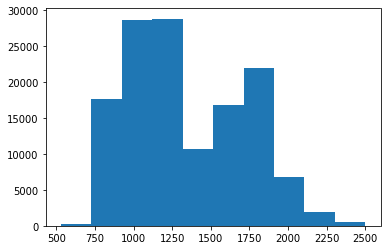

In [12]:
plt.hist(df_noNA_subset["Temp_BB"])